## Dactim MRI - Tutorial

Here is some example of a basic pipeline to register a T1 weighted image in the MNI152 atlas.
For that purpose, 4 functions of the transformation scripts will be used. 
To be sure to not have libraries issues, we recommend to check if you have the following libraries:
- Torchio
- SimpleITK
- Nibabel
- Numpy


Let's begin by the calls to import the scripts for the transfomation that we will be using.

In the `visualization` script, we will import the function:
- `plot` using the eponym function of **Torchio**

In the `transformation` script we will import the function:
- `skull_stripping` to extract the brain
- `resample` to transform voxels in the same dimension than MNI152 voxels
- `registration` to align the T1 weighted image into the MNI152 space
- `n4_bias_field_correction` to remove the bias field of the T1 weighted image generated by the b0 field of the MRI

Finally, we will import the class `Data` to have all the necessary information quickly and easily to ensure that our transformation works as intended.


In [1]:
from dactim_mri.visualization import plot

from dactim_mri.transformation import (
    skull_stripping,
    resample,
    registration,
    n4_bias_field_correction
)

from dactim_mri.data import Data

import matplotlib.pyplot as plt
import os

c:\Users\467355\Documents\Envs\preprocEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's load our images ! Starting by the T1 weighted image and then the MNI152 image, both in NifTI format.

To have more information about NifTI format, you can go to the [NifTI official website](https://nifti.nimh.nih.gov/).
Also, you can download the MNI152 image from [Neuroconductor](https://neuroconductor.org/help/MNITemplate/).

Let's check our images by using the function `plot`.

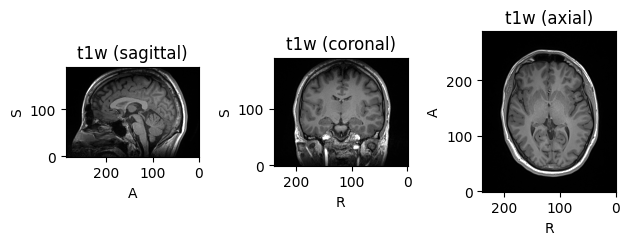

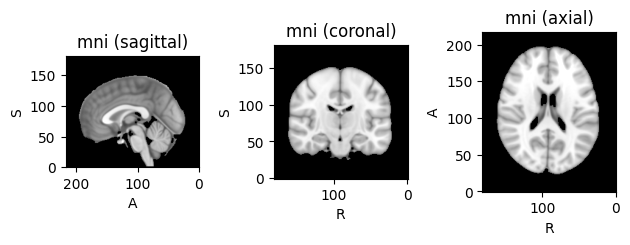

In [3]:
t1_path = "data/t1w.nii.gz"
mni_path = "data/mni.nii.gz"

plot(t1_path)
plot(mni_path)

Beautiful ! We can also use the `Data` class to display the main information of both of the NifTI objects by using the `print` function.

Each object stores information about:
- The shape (as tuple of int) called by the attribute `shape`
- The voxel dimension (as list of float) called by the attribute `pixdim`
- The affine (as a 2D list of float) called by the attribute `affine`
- The full NifTI generated header called by the attribute `header`
- The array of values (as numpy array) called by the attribute `array`

In [4]:
t1 = Data(t1_path)
print(t1)

mni = Data(mni_path)
print(mni)

Dactim MRI - Data Object:
	Shape: (240, 288, 192)
	Voxel dimension: [0.8888889  0.8888889  0.90000004]
	Affine:
[[ 8.88878286e-01 -4.34391340e-03  0.00000000e+00 -1.05155334e+02]
 [ 4.34391340e-03  8.88878286e-01  0.00000000e+00 -1.30047836e+02]
 [ 0.00000000e+00  0.00000000e+00  9.00001526e-01 -6.65795441e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]


We can start our first transformation. It will be the brain extraction function called `skull_stripping`
Let's see how to use the function:

bse.exe -i "data/t1w.nii.gz" -o "data/t1w_brain.nii.gz" --mask "data/t1w_brain_mask.nii.gz" --auto


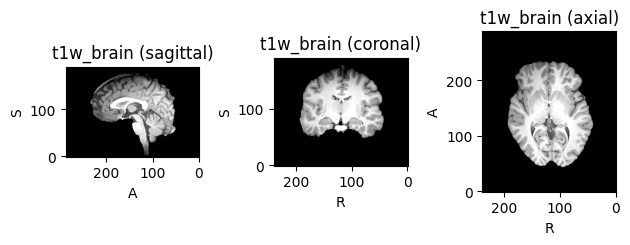

In [6]:
t1_brain_path, mask_brain_path = skull_stripping(t1_path, mask=True)

os.chdir(r"C:\Users\467355\Documents\dactim-mri\tests")
plot(t1_brain_path)

Nice ! All the non-cerebral tissus have been removed. 

Now that our data is cleaned of all the useful tissus, we can resample the dimension of the voxels to match those in the MNI152 image.
For that purpose, we need to use the function `resample`.

INFO - Starting resampling for
	data/mni.nii.gz
	data/t1w_brain.nii.gz


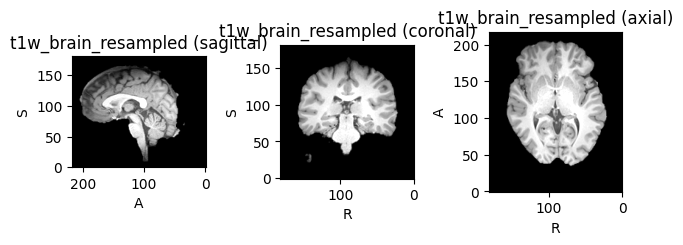

In [7]:
resample(mni_path, t1_brain_path)

t1_brain_resample_path = t1_brain_path.replace(".nii", "_resampled.nii")
plot(t1_brain_resample_path)

We can already see the different in the axis of the `plot` function. To ensure that we did a good job, let's print our resulted image with the `Data` class once again.

In [8]:
print(Data(t1_brain_resample_path))
print(mni)

Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]


Nailed it! Both of the image are in the same space. 
Ok, but now we want them to be perfectly aligned. After all, that's our main goal.

Let's use the function `registration`. We do not need the transformation matrix in that case, so `matrix` is equal to `False`.

INFO - Registration already done for
	data/t1w_brain_resampled.nii.gz
	data/mni.nii.gz


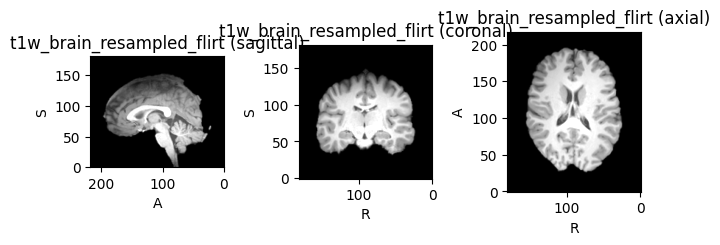

In [9]:
t1_brain_resample_flirt_path = registration(mni_path, t1_brain_resample_path, matrix=False, force=False)

plot(t1_brain_resample_flirt_path)

Let's see if our T1 weighted image is still in the MNI152 space.

In [10]:
print(Data(t1_brain_resample_flirt_path))
print(mni)

Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]


We will do an extra transformation that is removing the bias field of the T1 weighted image by using the function `n4_bias_field_correction`.
Let's also save the mask of the bias field by putting `mask` to `True`.

INFO - Starting bias field correction for
	data/t1w_brain_resampled_flirt.nii.gz
INFO - Bias field correction already done for
	data/t1w_brain_resampled_flirt.nii.gz


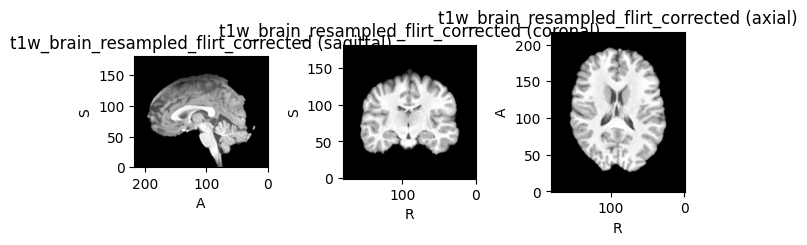

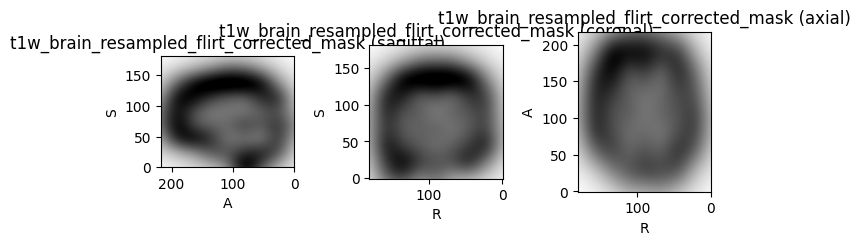

In [11]:
t1_brain_resample_flirt_corrected_path, bias_field_path = n4_bias_field_correction(t1_brain_resample_flirt_path, mask=True, force=False)

plot(t1_brain_resample_flirt_corrected_path)
plot(bias_field_path)

Great ! We can finally plot both of the MNI152 image and our final T1 weighted image to check if they are aligned.

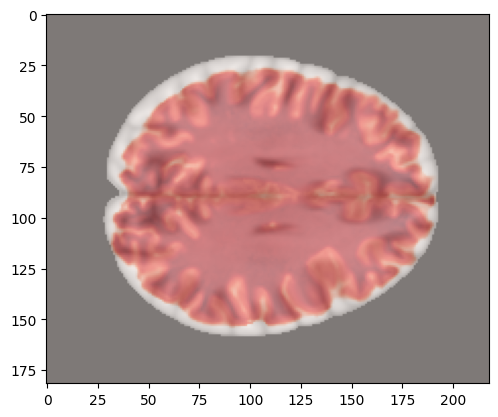

In [18]:
plt.imshow(mni.array[:,:,100], cmap='gray')

final_t1 = Data(t1_brain_resample_flirt_corrected_path)
plt.imshow(final_t1.array[:,:,100], cmap='Reds', alpha=0.5)

plt.show()